In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl as ql
import datetime as dt

In [2]:
# 2.4. Commodities

# 2.4.1. Oil WTI Spot Price FOB (U.S. Energy Information Administration Data)
# 2.4.2. Gold Price (Deutsche Bundesbank Data)
# Data Query and Range Delimiting
commquery = ql.get(["EIA/PET_RWTC_D","BUNDESBANK/BBK01_WT5511"], collapse="monthly")
mcommall = commquery['2006-04-01':'2016-04-30']
mcommall.columns =['moil', 'mgold']

In [3]:
# Monthly and Annual Returns Calculation
mcommall.loc[:, 'moilret'] = mcommall.loc[:, 'moil'] / mcommall.loc[:, 'moil'].shift(1) - 1
mcommall.loc[:, 'aoilret'] = mcommall.loc[:, 'moil'] / mcommall.loc[:, 'moil'].shift(12) - 1

mcommall.loc[:, 'mgoldret'] = mcommall.loc[:, 'mgold'] / mcommall.loc[:, 'mgold'].shift(1) - 1
mcommall.loc[:, 'agoldret'] = mcommall.loc[:, 'mgold'] / mcommall.loc[:, 'mgold'].shift(12) - 1


C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [4]:
# Cumulative Monthly Returns Calculation
mcommall.loc[:, 'moilcum'] = np.cumprod(mcommall.loc[:, 'moilret'] + 1) - 1
mcommall.loc[:, 'mgoldcum'] = np.cumprod(mcommall.loc[:, 'mgoldret'] + 1) - 1

C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [5]:
# Annualized Monthly Returns Calculation
mcommall.loc[:, 'moilcuma'] = np.cumprod(mcommall.loc[:, 'moilret'] + 1) ** (12 / len(mcommall)) - 1
mcommall.loc[:, 'mgoldcuma'] = np.cumprod(mcommall.loc[:, 'mgoldret'] + 1) ** (12 / len(mcommall)) - 1


C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nisha\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 4, 30)
moilreta = mcommall.at[lastdate, 'moilcuma']
mgoldreta = mcommall.at[lastdate, 'mgoldcuma']

In [7]:
# Annualized Monthly Standard Deviation Calculation
moilstdeva = np.std(mcommall.loc[:, 'moilret']) * np.sqrt(12)
mgoldstdeva = np.std(mcommall.loc[:, 'mgoldret']) * np.sqrt(12)


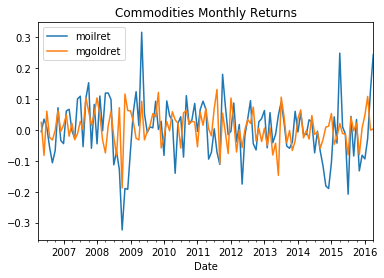

In [8]:
# 2.4.2. Commodities Charts and Tables

# Monthly Returns Chart
mcommall.plot(y=['moilret', 'mgoldret'])
plt.title('Commodities Monthly Returns')
plt.legend(loc='upper left')
plt.show()

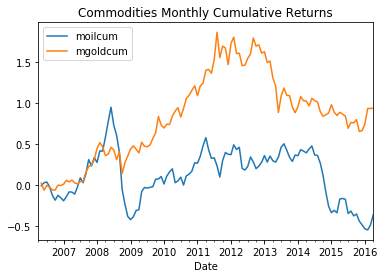

In [9]:
# Cumulative Monthly Returns Chart
mcommall.plot(y=['moilcum', 'mgoldcum'])
plt.title('Commodities Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [10]:
# Annualized Monthly Return and Standard Deviation Table
commdata = [{'0': '', '1': 'moilret', '2': 'mgoldret'},
        {'0': 'Annualized Return', '1': moilreta, '2': mgoldreta},
        {'0': 'Annualized Standard Deviation', '1': moilstdeva, '2': mgoldstdeva}]
commtable = pd.DataFrame(commdata)
print("")
print(commtable)
print("")


                               0          1          2
0                                   moilret   mgoldret
1              Annualized Return -0.0432369  0.0678856
2  Annualized Standard Deviation   0.331441   0.191832

